You can choose to upload the Kaggle API token to download the data, download it manually and upload it to this Colab instance, or simply download it from a Google Drive link using gdown, you can choose to run either one.

# New Section

In [ ]:
### Import all library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# load the dataset
news_d = pd.read_csv("train.csv")
# submit_test = pd.read_csv("test.csv")

In [ ]:
news_d.head()


,Unnamed: 0,text,subject,target
0,0,new york reuters us environmental group sierra...,politicsNews,TRUE
1,1,washington reuters us air force asked industry...,politicsNews,TRUE
2,2,saturday paul ryan posted photo instagram phot...,News,Fake
3,3,america keeps waiting word hillary indicted ob...,politics,Fake
4,4,religion peace ht weasel zippers,left-news,Fake


In [ ]:

news_d.target

0        TRUE
1        TRUE
2        Fake
3        Fake
4        Fake
         ... 
19986    Fake
19987    Fake
19988    TRUE
19989    TRUE
19990    Fake
Name: target, Length: 19991, dtype: object

In [ ]:
news_d['target'] = news_d['target'].astype(str)
news_d['target'] = news_d['target'].replace(['TRUE','Fake'],[1,0])
news_d['target'] = news_d['target'].astype(int)
# submit_test['label'] = submit_test['label'].replace(['real','fake'],[1,0])

In [ ]:
news_d.dtypes

Unnamed: 0     int64
text          object
subject       object
target         int64
dtype: object

In [ ]:
## Shape and colums of train dataset
print(" Shape of News data :: ", news_d.shape)
print(" News data columns", news_d.columns)

 Shape of News data ::  (19991, 4)
 News data columns Index(['Unnamed: 0', 'text', 'subject', 'target'], dtype='object')


In [ ]:
## by using df.head(),We can immediately familiarize ourselves with the dataset. 
news_d.head()

,Unnamed: 0,text,subject,target
0,0,new york reuters us environmental group sierra...,politicsNews,1
1,1,washington reuters us air force asked industry...,politicsNews,1
2,2,saturday paul ryan posted photo instagram phot...,News,0
3,3,america keeps waiting word hillary indicted ob...,politics,0
4,4,religion peace ht weasel zippers,left-news,0


In [ ]:
#Text Word startistics: min.mean, max and interquartile range

txt_length = news_d.text.str.split().str.len()
txt_length.describe()

count    19716.000000
mean       234.262781
std        186.236090
min          1.000000
25%        122.000000
50%        207.000000
75%        292.250000
max       3509.000000
Name: text, dtype: float64

In [ ]:
news_d = news_d.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1: True
0: Fake
Distribution of labels:
0    10121
1     9595
Name: target, dtype: int64


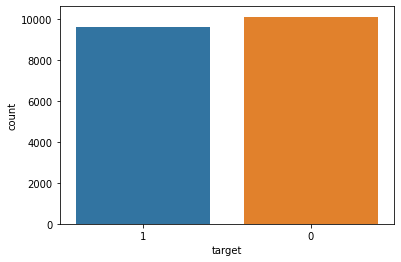

In [ ]:
news_d['target'] = news_d['target'].map(str)
sns.countplot(x="target", data=news_d);
print("1: True")
print("0: Fake")
print("Distribution of labels:")
print(news_d.target.value_counts());


In [ ]:
print(round(news_d.target.value_counts(normalize=True),2)*100);

0    51.0
1    49.0
Name: target, dtype: float64


In [ ]:
column_n = ['Unnamed: 0','text', 'target', 'subject']
remove_c = ['Unnamed: 0', 'subject']
categorical_features = []
target_col = ['target']
text_f = ['text']

In [ ]:
# Clean Datasets
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

# Removed unused clumns
def remove_unused_c(df,column_n=remove_c):
    df = df.drop(column_n,axis=1)
    return df

# Impute null values with None
def null_process(feature_df):
    for col in text_f:
        feature_df.loc[feature_df[col].isnull(), col] = "None"
    return feature_df

def clean_dataset(df):
    # remove unused column
    df = remove_unused_c(df)
    #impute null values
    df = null_process(df)
    return df

# Cleaning text from unused characters
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    #text = ' '.join(text)    
    return text

## Nltk Preprocessing include:
# Stop words, Stemming and Lemmetization
# For our project we use only Stop word removal
def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    #text = ' '.join([word for word in wordlist if word not in stopwords_dict])
    #text = [ps.stem(word) for word in wordlist if not word in stopwords_dict]
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Perform data cleaning on train and test dataset by calling clean_dataset function
df = clean_dataset(news_d)
# apply preprocessing on text through apply method by calling the function nltk_preprocess
df["text"] = df.text.apply(nltk_preprocess)
# apply preprocessing on title through apply method by calling the function nltk_preprocess
# df["title"] = df.title.apply(nltk_preprocess)

In [ ]:
# Dataset after cleaning and preprocessing step
df.head()

,text,target
0,new york reuters u environmental group sierra ...,1
1,washington reuters u air force asked industry ...,1
2,saturday paul ryan posted photo instagram phot...,0
3,america keep waiting word hillary indicted oba...,0
4,religion peace ht weasel zipper,0


In [ ]:
# df['target'].isnan()



In [ ]:
df.dtypes

text      object
target    object
dtype: object

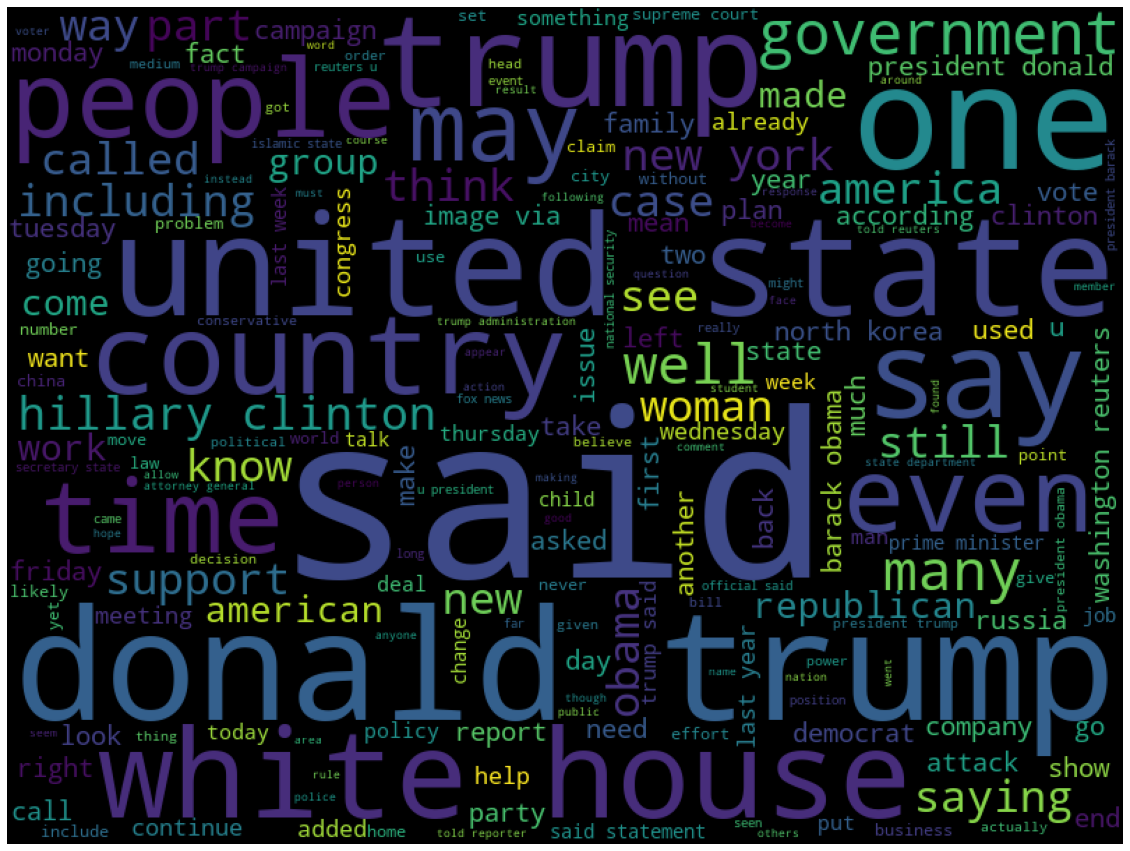

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# initialize the word cloud
wordcloud = WordCloud( background_color='black', width=800, height=600)
# generate the word cloud by passing the corpus
text_cloud = wordcloud.generate(' '.join(df['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

In [ ]:
df.target.value_counts()

0    10121
1     9595
Name: target, dtype: int64

In [ ]:
df['target'] = df['target'].astype(int)


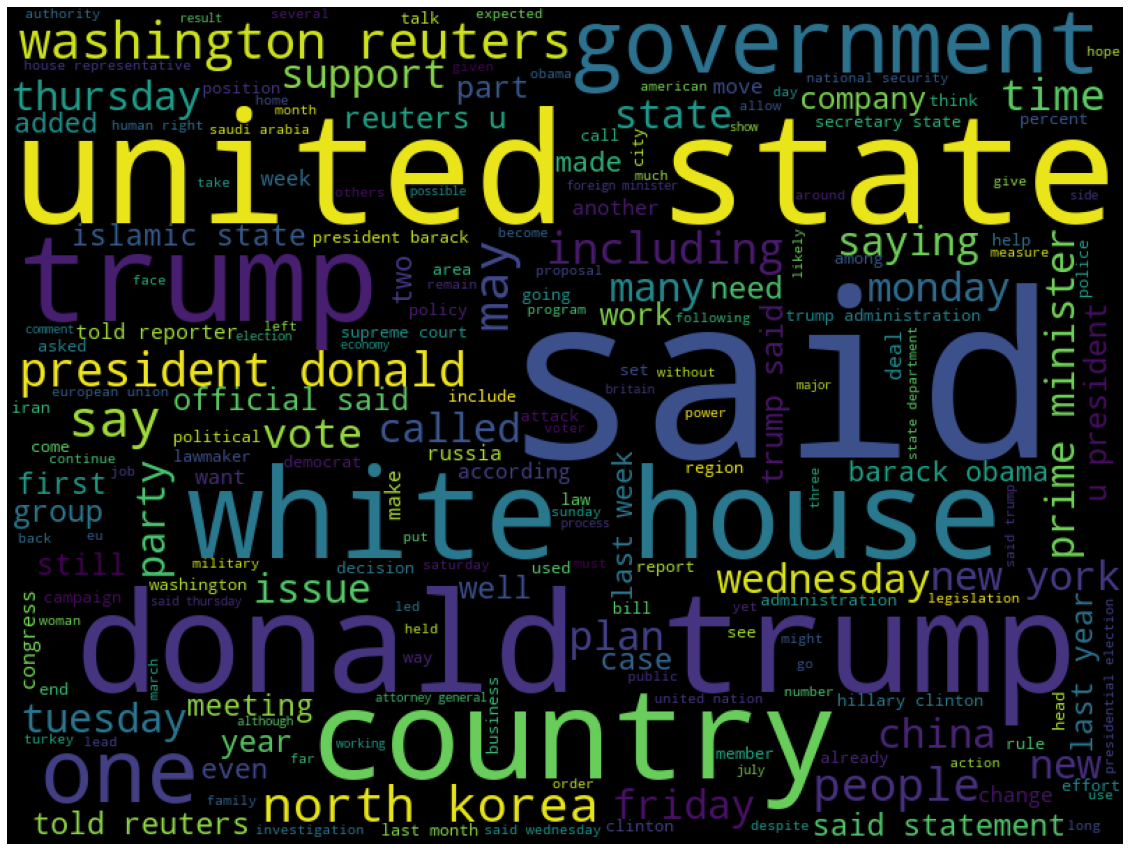

In [ ]:
true_n = ' '.join(df[df['target']==1]['text']) 
wc = wordcloud.generate(true_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

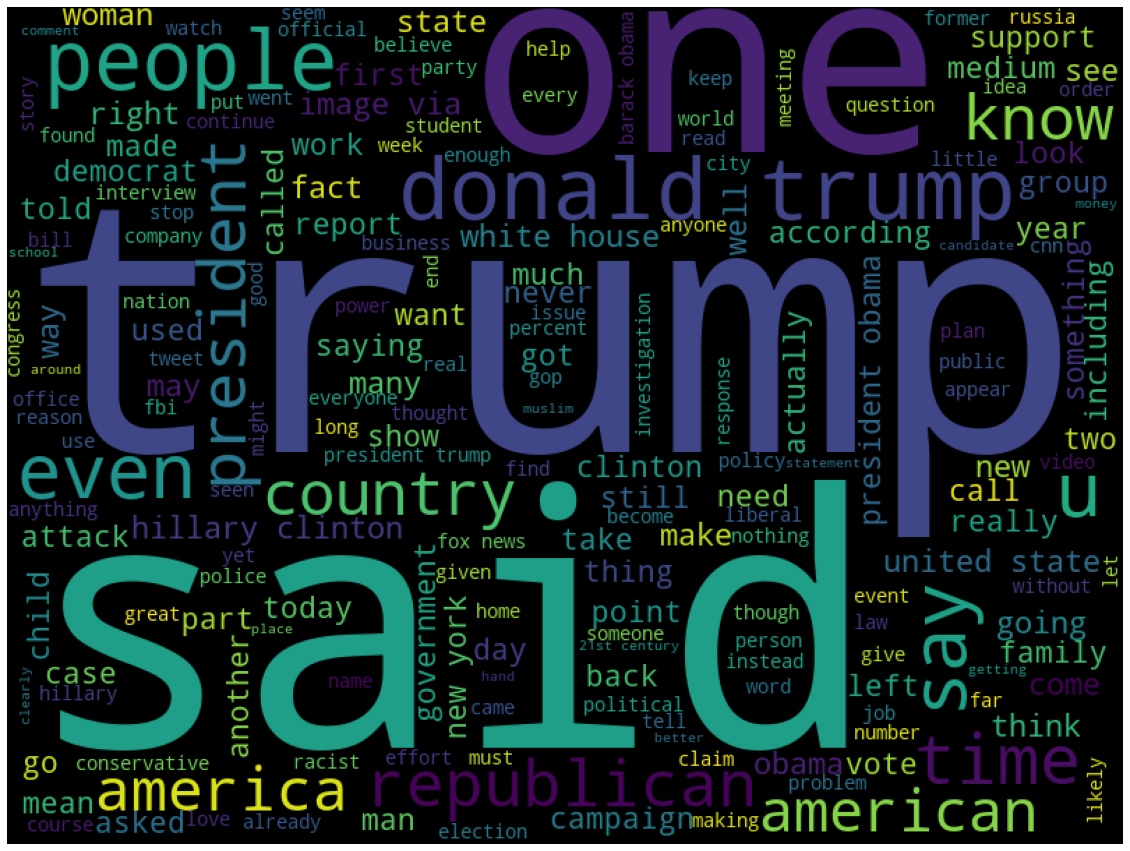

In [ ]:
fake_n = ' '.join(df[df['target']==0]['text'])
wc= wordcloud.generate(fake_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurences", n=2):
  """Utility function to plot top n-grams"""
  true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
  true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

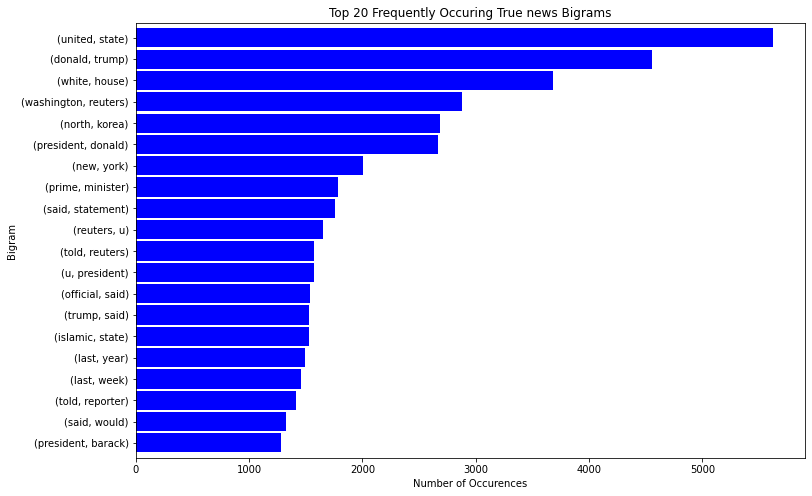

In [ ]:
plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Bigrams', "Bigram", n=2)

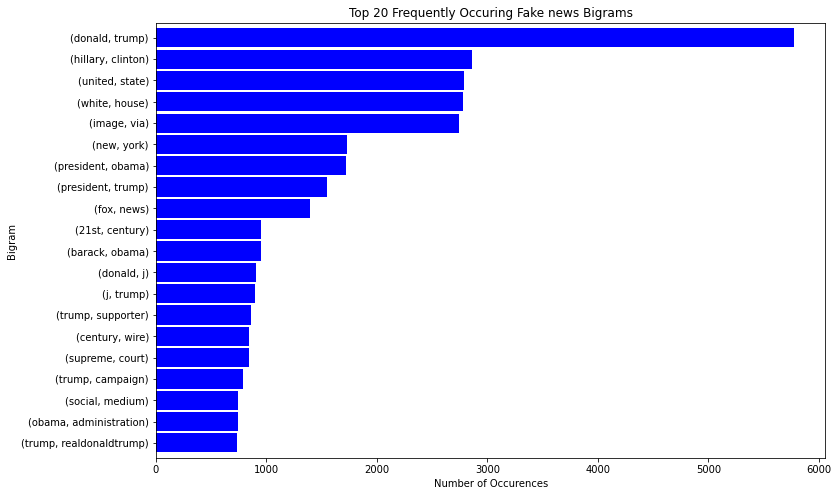

In [ ]:
plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)

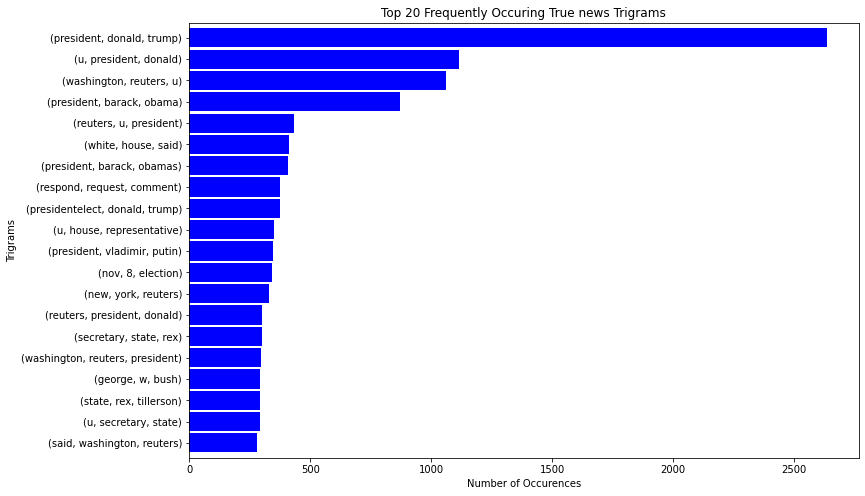

In [ ]:
plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Trigrams', "Trigrams", n=3)

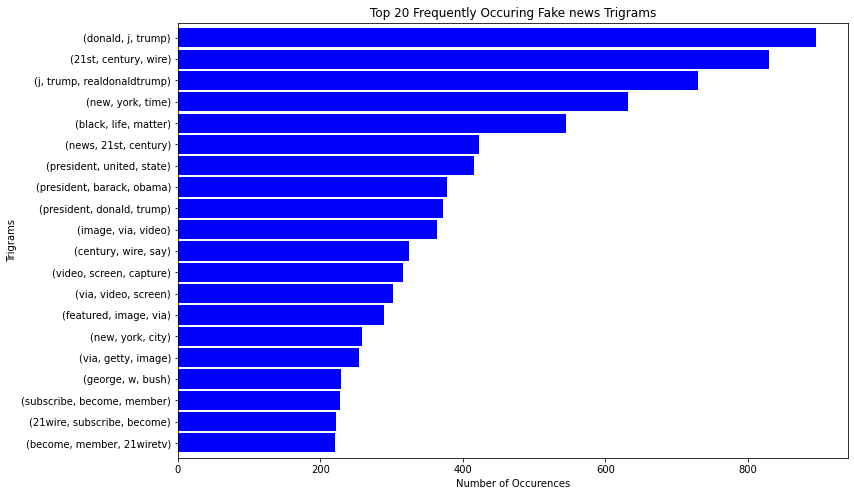

In [ ]:
plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Trigrams', "Trigrams", n=3)

# Fine-tuning BERT

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.0 MB/s 
     |████████████████████████████████| 182 kB 72.3 MB/s 
     |████████████████████████████████| 7.6 MB 29.9 MB/s 


In [ ]:

from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.model_selection import train_test_split

import random

In [ ]:
def set_seed(seed: int):
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).

    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
    if is_tf_available():
        import tf

        tf.random.set_seed(seed)

set_seed(1)

In [ ]:
# the model we gonna train, base uncased BERT
model_name = "bert-base-uncased"
# max sequence length for each document/sentence sample
max_length = 512

In [ ]:
# load the tokenizer
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
news_df = news_d[news_d['text'].notna()]
news_df['target'] = news_df['target'].astype(int)
# news_df = news_df[news_df["author"].notna()]
# news_df = news_df[news_df["title"].notna()]

In [ ]:
def prepare_data(df, test_size=0.2, include_title=True, include_author=True):
  texts = []
  labels = []
  for i in range(len(df)):
    tweet = df["text"].iloc[i]
    label = df["target"].iloc[i]
    # if include_title:
    #   text = df["title"].iloc[i] + " - " + text
    # if include_author:
    #   text = df["author"].iloc[i] + " : " + text
    if tweet and label in [1, 0]:
      texts.append(tweet)
      labels.append(label)
  return train_test_split(texts, labels, test_size=test_size)

train_texts, valid_texts, train_labels, valid_labels = prepare_data(news_df)

In [ ]:
print(len(train_texts), len(train_labels))
print(len(valid_texts), len(valid_labels))

15772 15772
3944 3944


In [ ]:
# tokenize the dataset, truncate when passed `max_length`, 
# and pad with 0's when less than `max_length`
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

In [ ]:
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

In [ ]:
# load the model
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds)
  f1 = f1_score(labels, preds)
  recall = recall_score(labels, preds)
  precision = precision_score(labels, preds)
  return {
      'accuracy': acc,
      'recall': recall,
      'precision': precision,
      'f1': f1,
  }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=1,              # total number of training epochs
    per_device_train_batch_size=10,  # batch size per device during training
    per_device_eval_batch_size=20,   # batch size for evaluation
    warmup_steps=100,                # number of warmup steps for learning rate scheduler
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    
    logging_steps=200,               # log & save weights each logging_steps
    save_steps=200,
    evaluation_strategy="steps",     # evaluate each `logging_steps`
)

In [ ]:
trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [ ]:
# train the model
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 15772
  Num Epochs = 1
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 1578
  Number of trainable parameters = 109483778


Step,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
200,0.161000,0.016236,0.996450,0.999485,0.993340,0.996403
400,0.007900,0.012693,0.997465,0.998969,0.995889,0.997427
600,0.014900,0.033275,0.993154,0.986082,1.000000,0.992992
800,0.010400,0.002634,0.999746,0.999485,1.000000,0.999742
1000,0.002900,0.006655,0.998986,0.999485,0.998455,0.998970
1200,0.005100,0.002997,0.999493,0.999485,0.999485,0.999485
1400,0.001400,0.004200,0.998986,0.997938,1.000000,0.998968


***** Running Evaluation *****
  Num examples = 3944
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-200
Configuration saved in ./results/checkpoint-200/config.json
Model weights saved in ./results/checkpoint-200/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3944
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-400
Configuration saved in ./results/checkpoint-400/config.json
Model weights saved in ./results/checkpoint-400/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3944
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-600
Configuration saved in ./results/checkpoint-600/config.json
Model weights saved in ./results/checkpoint-600/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3944
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-800
Configuration saved in ./results/checkpoint-800/config.json
Model weights saved in ./results/checkpoint-800/pytorch_model.bin
****

TrainOutput(global_step=1578, training_loss=0.026569443737146065, metrics={'train_runtime': 2301.9795, 'train_samples_per_second': 6.851, 'train_steps_per_second': 0.685, 'total_flos': 4149787565137920.0, 'train_loss': 0.026569443737146065, 'epoch': 1.0})

In [ ]:
# evaluate the current model after training
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 3944
  Batch size = 20


{'eval_loss': 0.0026339462492614985,
 'eval_accuracy': 0.9997464503042597,
 'eval_recall': 0.9994845360824742,
 'eval_precision': 1.0,
 'eval_f1': 0.9997422015983501,
 'eval_runtime': 121.6464,
 'eval_samples_per_second': 32.422,
 'eval_steps_per_second': 1.628,
 'epoch': 1.0}

In [ ]:
# saving the fine tuned model & tokenizer
model_path = "Covid Dataset Analysis BERT Model: Trained"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

Configuration saved in Covid Dataset Analysis BERT Model: Trained/config.json
Model weights saved in Covid Dataset Analysis BERT Model: Trained/pytorch_model.bin
tokenizer config file saved in Covid Dataset Analysis BERT Model: Trained/tokenizer_config.json
Special tokens file saved in Covid Dataset Analysis BERT Model: Trained/special_tokens_map.json


('Covid Dataset Analysis BERT Model: Trained/tokenizer_config.json',
 'Covid Dataset Analysis BERT Model: Trained/special_tokens_map.json',
 'Covid Dataset Analysis BERT Model: Trained/vocab.txt',
 'Covid Dataset Analysis BERT Model: Trained/added_tokens.json',
 'Covid Dataset Analysis BERT Model: Trained/tokenizer.json')

In [ ]:
def get_prediction(text, convert_to_label=False):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    # executing argmax function to get the candidate label
    d = {
        0: "fake",
        1: "TRUE"
    }
    if convert_to_label:
      return d[int(probs.argmax())]
    else:
      return int(probs.argmax())

In [ ]:
real_news = """
alfalfa is the only cure for covid 19
"""

In [ ]:
get_prediction(real_news, convert_to_label=True)

'real'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# read the test set
test_df = pd.read_csv("Constraint_Test.csv")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-53-69bffd70b910>", line 2, in <module>
    test_df = pd.read_csv("Constraint_Test.csv")
  File "/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers/readers.py", line 586, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers/readers.py", line 482, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers/readers.py", line 811, in __init__
    self._engine = self._make_engine(self.engine)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers/readers.py", line 1040, in _make_engine
    return map

FileNotFoundError: ignored

In [ ]:
test_df.head()

In [ ]:
# make a copy of the testing set
new_df = test_df.copy()

In [ ]:
# add a new column that contains the author, title and article content
new_df["new_text"] = new_df["tweet"].astype(str)
new_df.head()

In [ ]:
# get the prediction of all the test set
new_df["label"] = new_df["new_text"].apply(get_prediction)

In [ ]:
# make the submission file
final_df = new_df[["id","tweet", "label"]]
final_df.to_csv("submit_final.csv", index=False)

In [ ]:
!zip -r /content/model_savedile.zip /content/fake-news-bert-base-uncased

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')